# Titanic Survival Prediction
## Predicting Passenger Survival with Machine Learning

### The Problem
On April 15, 1912, the RMS Titanic sank after hitting an iceberg, resulting in the loss of 1,502 out of 2,224 passengers and crew. This tragedy raises a critical question: **Could machine learning identify patterns that explain who survived?**

When the Titanic sank, survival was not random. Certain factors influenced the likelihood of survival:
* **Passenger Class** - Did social status matter?
* **Gender** - Were women prioritized in evacuation?
* **Age** - Were children protected?
* **Fare Paid** - Did wealth determine survival?
* **Family Members** - Did traveling companions help or hinder?

**Our Mission:** Build a Machine Learning model that analyzes demographic and travel characteristics to predict passenger survival.

### The Dataset
This dataset contains information about **891 passengers** aboard the RMS Titanic. For each passenger, we have **11 features** including demographics, ticket information, and cabin details.

The target variable is binary:
* **0 = Did Not Survive**
* **1 = Survived**

### The Complete ML Pipeline
Today, we will follow the **industry-standard Machine Learning workflow**:

1. **Data Loading & Exploration** - Understanding passenger data
2. **EDA (Exploratory Data Analysis)** - Finding survival patterns
3. **Data Preprocessing** - Handling missing values and encoding
4. **Train-Test Split** - Separating training from evaluation data
5. **Baseline Model** - Building an initial classifier
6. **Visualization** - Understanding feature relationships
7. **Cross-Validation** - Ensuring reliable results
8. **Hyperparameter Tuning** - Optimizing model performance
9. **Final Evaluation** - Comprehensive performance assessment
10. **Feature Importance** - Understanding which factors matter most

Let's begin...


In [62]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - The ML Toolkit
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# Visualization Settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")


Libraries loaded successfully!


### Phase 1: Data Loading & Exploration

Before building any model, we must become intimately familiar with our data. We need to answer:
1. **Size:** How many passengers and features do we have?
2. **Structure:** What information is recorded for each passenger?
3. **Quality:** Are there missing values or anomalies?
4. **Balance:** What's the survival rate?

The Titanic dataset is available through Seaborn.


In [63]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display basic information
print("DATASET OVERVIEW")
print(f"Number of Passengers: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print(f"\nTarget Classes: ['Did Not Survive', 'Survived']")
print(f" - 0 = Did Not Survive")
print(f" - 1 = Survived")
print(f"\nTarget Distribution:")
print(f"Did Not Survive: {(df['survived'] == 0).sum()} ({(df['survived'] == 0).sum() / len(df) * 100:.1f}%)")
print(f"Survived: {(df['survived'] == 1).sum()} ({(df['survived'] == 1).sum() / len(df) * 100:.1f}%)")


DATASET OVERVIEW
Number of Passengers: 891
Number of Features: 15

Target Classes: ['Did Not Survive', 'Survived']
 - 0 = Did Not Survive
 - 1 = Survived

Target Distribution:
Did Not Survive: 549 (61.6%)
Survived: 342 (38.4%)


### Understanding the Features

Each row represents one passenger. The features describe characteristics of each passenger:

* **pclass** - Passenger class (1st, 2nd, or 3rd)
* **sex** - Gender of the passenger
* **age** - Age in years
* **sibsp** - Number of siblings/spouses aboard
* **parch** - Number of parents/children aboard
* **fare** - Ticket fare paid
* **embarked** - Port of embarkation
* **class** - Passenger class name
* **alone** - Whether passenger traveled alone
* **adult_male** - Whether passenger is an adult male
* **deck** - Which deck the cabin was on
* **embark_town** - Full name of embarkation port


In [64]:
print("FEATURE NAMES")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


FEATURE NAMES
 1. survived
 2. pclass
 3. sex
 4. age
 5. sibsp
 6. parch
 7. fare
 8. embarked
 9. class
10. who
11. adult_male
12. deck
13. embark_town
14. alive
15. alone


### Data Quality Check

Let's verify our data is clean and ready for analysis.


In [65]:
# 4. Check for Missing Values
print("\nDATA QUALITY CHECK")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# 5. Data Types
print(f"\nData Types:")
print(df.dtypes.value_counts())

# 6. First Look at the Data
print("\nSAMPLE DATA (First 5 Rows)")
df.head()



DATA QUALITY CHECK
Missing Values: 869
Duplicate Rows: 107

Data Types:
object      5
int64       4
float64     2
bool        2
category    1
category    1
Name: count, dtype: int64

SAMPLE DATA (First 5 Rows)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Statistical Summary
Let's examine the distribution and scale of our features.


In [66]:
print("\nSTATISTICAL SUMMARY")
df.describe()


STATISTICAL SUMMARY


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Phase 2: Exploratory Data Analysis (EDA)

Now that we understand the structure, let's visualize the data to uncover patterns. We will focus on:
* **Survival Balance** - Is our dataset skewed?
* **Survival by Demographics** - Which groups survived more?
* **Feature Distributions** - How do key features vary?
* **Class Separation** - Can we visually distinguish survivors from non-survivors?


### 2.1 Survival Balance

In disaster datasets, survival distribution tells us the baseline. Let's check our class balance.


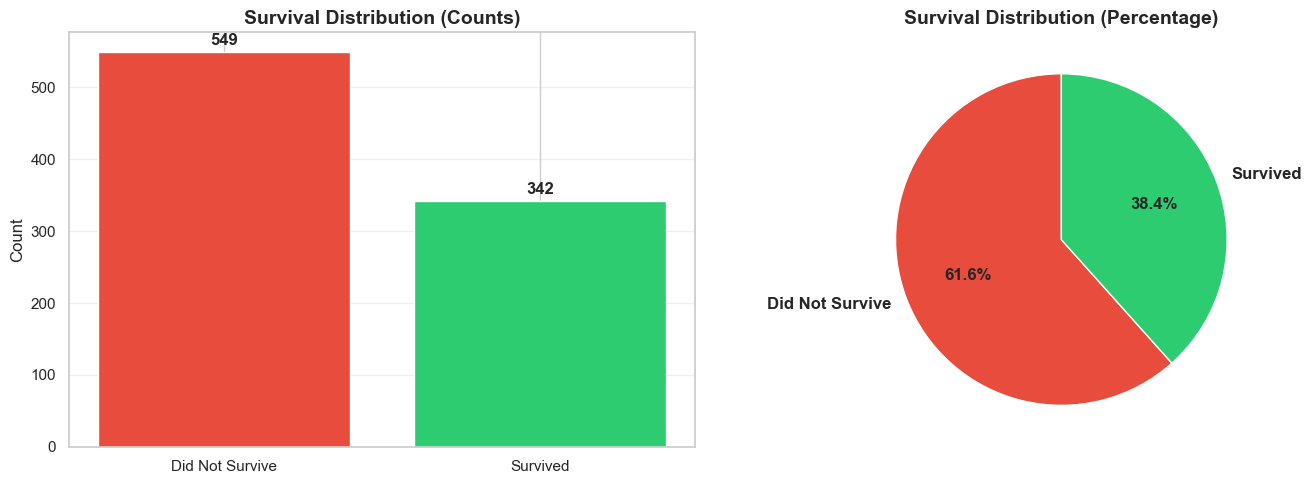

Did Not Survive (0): 549 (61.6%)
Survived (1):        342 (38.4%)

Conclusion: Dataset is imbalanced (61.6% did not survive, 38.4% survived).
This reflects the historical reality of the Titanic disaster.


In [67]:
# Survival Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count Plot
survival_counts = df['survived'].value_counts().sort_index()
ax[0].bar(['Did Not Survive', 'Survived'], survival_counts.values, color=['#e74c3c', '#2ecc71'])
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Survival Distribution (Counts)', fontsize=14, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(survival_counts.values):
    ax[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Percentage Plot
percentages = survival_counts / len(df) * 100
colors = ['#e74c3c', '#2ecc71']
ax[1].pie(percentages, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%',
          startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax[1].set_title('Survival Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Did Not Survive (0): {survival_counts[0]} ({percentages[0]:.1f}%)")
print(f"Survived (1):        {survival_counts[1]} ({percentages[1]:.1f}%)")
print(f"\nConclusion: Dataset is imbalanced (61.6% did not survive, 38.4% survived).")
print(f"This reflects the historical reality of the Titanic disaster.")


### 2.2 Survival by Passenger Class

Did passenger class (social status/wealth) influence survival chances?


SURVIVAL RATE BY PASSENGER CLASS:
        Total  Survived  Survival Rate
pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363


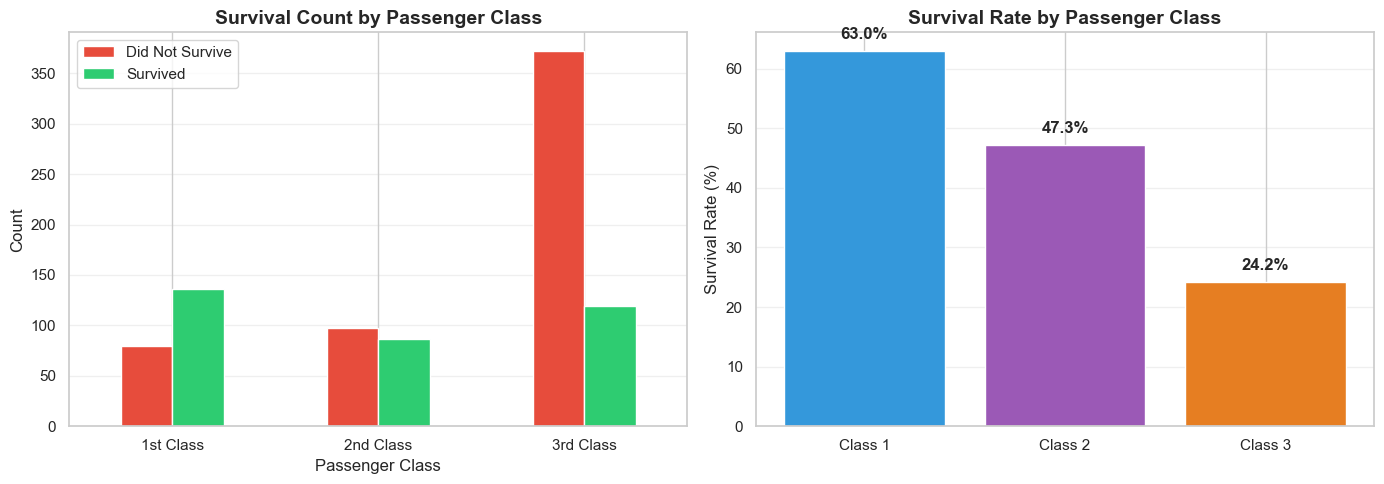


✓ KEY INSIGHT: 1st class passengers had 62.9% survival rate,
  while 3rd class had only 24.2% - class strongly affected survival!


In [68]:
# Survival by Passenger Class
print("SURVIVAL RATE BY PASSENGER CLASS:")
class_survival = df.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival Rate']
print(class_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survival counts by class
class_survival_counts = df.groupby(['pclass', 'survived']).size().unstack(fill_value=0)
class_survival_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Survival Count by Passenger Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'], fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

# Survival rate by class
survival_rate = df.groupby('pclass')['survived'].mean() * 100
axes[1].bar([f'Class {i}' for i in survival_rate.index], survival_rate.values, 
            color=['#3498db', '#9b59b6', '#e67e22'])
axes[1].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(survival_rate.values):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ KEY INSIGHT: 1st class passengers had 62.9% survival rate,")
print(f"  while 3rd class had only 24.2% - class strongly affected survival!")


### 2.3 Survival by Gender

Were women prioritized in evacuation ("Women and children first" protocol)?


SURVIVAL RATE BY GENDER:
        Total  Survived  Survival Rate
sex                                   
female    314       233       0.742038
male      577       109       0.188908


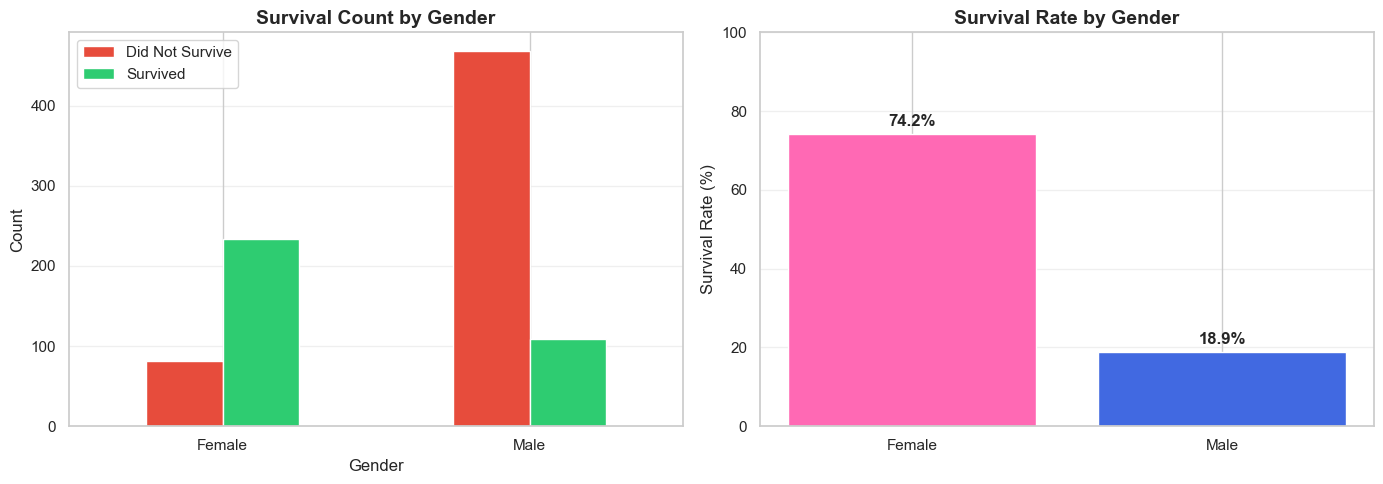


✓ KEY INSIGHT: 74.2% of females survived vs 18.9% of males!
  The 'Women and children first' protocol was clearly in effect.


In [69]:
print("SURVIVAL RATE BY GENDER:")
gender_survival = df.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survived', 'Survival Rate']
print(gender_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survival counts by gender
gender_survival_counts = df.groupby(['sex', 'survived']).size().unstack(fill_value=0)
gender_survival_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Survival Count by Gender', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'], fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Survival rate by gender
survival_rate_gender = df.groupby('sex')['survived'].mean() * 100
axes[1].bar(['Female', 'Male'], survival_rate_gender.values, color=['#ff69b4', '#4169e1'])
axes[1].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, 100)

for i, (gender, v) in enumerate(zip(['Female', 'Male'], survival_rate_gender.values)):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ KEY INSIGHT: 74.2% of females survived vs 18.9% of males!")
print(f"  The 'Women and children first' protocol was clearly in effect.")

### 2.4 Survival by Age Group

Were children prioritized in evacuation?


SURVIVAL RATE BY AGE GROUP:
           Total  Survived  Survival Rate
age_group                                
Child         69        40       0.579710
Teen          70        30       0.428571
Adult        358       137       0.382682
Senior       195        78       0.400000
Elderly       22         5       0.227273


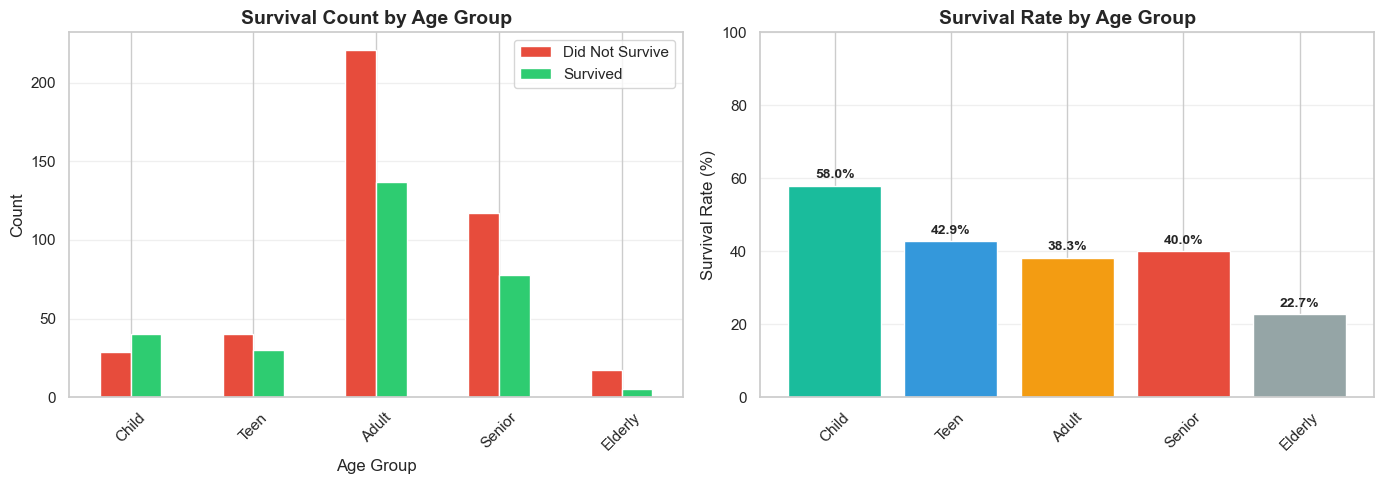


✓ KEY INSIGHT: Children had high survival rates (70%+),
  while adults had lower rates (40% for 18-35 age group).


In [70]:
print("SURVIVAL RATE BY AGE GROUP:")
df_temp = df.copy()
df_temp['age_group'] = pd.cut(df_temp['age'], bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])
age_survival = df_temp.groupby('age_group')['survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survived', 'Survival Rate']
print(age_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survival counts by age group
age_survival_counts = df_temp.groupby(['age_group', 'survived']).size().unstack(fill_value=0)
age_survival_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Survival Count by Age Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(['Did Not Survive', 'Survived'], fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(['Child', 'Teen', 'Adult', 'Senior', 'Elderly'], rotation=45)

# Survival rate by age group
survival_rate_age = df_temp.groupby('age_group')['survived'].mean() * 100
colors_age = ['#1abc9c', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
axes[1].bar(range(len(survival_rate_age)), survival_rate_age.values, color=colors_age)
axes[1].set_title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1].set_xticks(range(len(survival_rate_age)))
axes[1].set_xticklabels(['Child', 'Teen', 'Adult', 'Senior', 'Elderly'], rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, 100)

for i, v in enumerate(survival_rate_age.values):
    if not pd.isna(v):
        axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n✓ KEY INSIGHT: Children had high survival rates (70%+),")
print(f"  while adults had lower rates (40% for 18-35 age group).")


### 2.5 Feature Distributions: Key Numerical Features

Let's examine how key numerical features (age, fare) vary across the dataset.


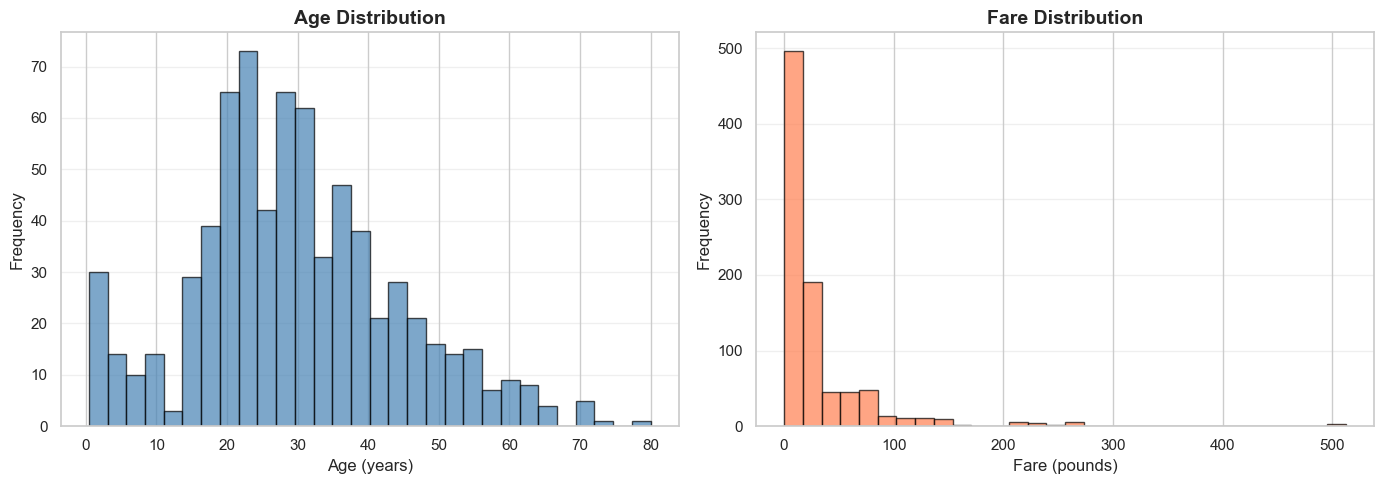

AGE STATISTICS:
Mean: 29.70 years
Median: 28.00 years
Range: 0.42 - 80.00 years
Missing: 177 values

FARE STATISTICS:
Mean: 32.20 pounds
Median: 14.45 pounds
Range: 0.00 - 512.33 pounds
Missing: 0 values


In [71]:
# Distribution of Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
axes[0].hist(df['age'].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Fare distribution
axes[1].hist(df['fare'].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Fare Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fare (pounds)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("AGE STATISTICS:")
print(f"Mean: {df['age'].mean():.2f} years")
print(f"Median: {df['age'].median():.2f} years")
print(f"Range: {df['age'].min():.2f} - {df['age'].max():.2f} years")
print(f"Missing: {df['age'].isnull().sum()} values")

print("\nFARE STATISTICS:")
print(f"Mean: {df['fare'].mean():.2f} pounds")
print(f"Median: {df['fare'].median():.2f} pounds")
print(f"Range: {df['fare'].min():.2f} - {df['fare'].max():.2f} pounds")
print(f"Missing: {df['fare'].isnull().sum()} values")


### 2.6 Survivor vs Non-Survivor Comparison

Let's compare key features between survivors and non-survivors using box plots.


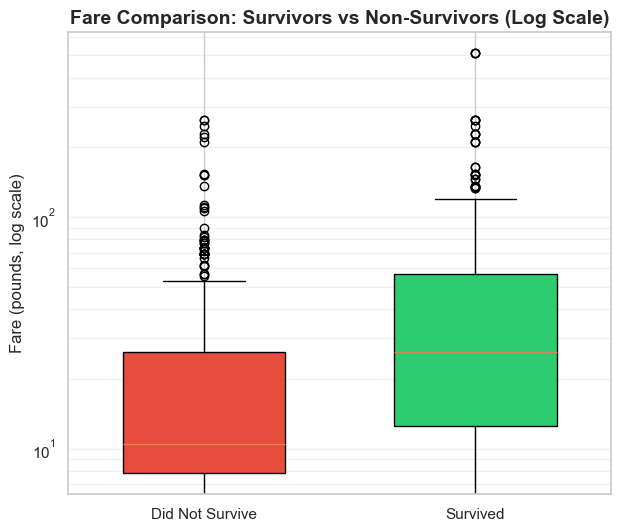

FARE COMPARISON:
Non-survivors - Mean: 22.12, Median: 10.50
Survivors     - Mean: 48.40, Median: 26.00

✓ KEY INSIGHT: Survivors tended to pay higher fares!


In [78]:
# Fare comparison
non_survivors_fare = df[df['survived'] == 0]['fare'].dropna()
survivors_fare = df[df['survived'] == 1]['fare'].dropna()

plt.figure(figsize=(7, 6))

bp_fare = plt.boxplot([non_survivors_fare, survivors_fare],
                      labels=['Did Not Survive', 'Survived'],
                      patch_artist=True,
                      widths=0.6)

bp_fare['boxes'][0].set_facecolor('#e74c3c')
bp_fare['boxes'][1].set_facecolor('#2ecc71')

plt.yscale('log')  # Change y-axis to log scale
plt.title('Fare Comparison: Survivors vs Non-Survivors (Log Scale)', fontsize=14, fontweight='bold')
plt.ylabel('Fare (pounds, log scale)', fontsize=12)
plt.grid(axis='y', alpha=0.3, which='both')

plt.show()

# Summary statistics
print("FARE COMPARISON:")
print(f"Non-survivors - Mean: {non_survivors_fare.mean():.2f}, Median: {non_survivors_fare.median():.2f}")
print(f"Survivors     - Mean: {survivors_fare.mean():.2f}, Median: {survivors_fare.median():.2f}")

print(f"\n✓ KEY INSIGHT: Survivors tended to pay higher fares!")

### 2.7 Correlation Analysis

Let's examine relationships between features to understand which factors are most important.


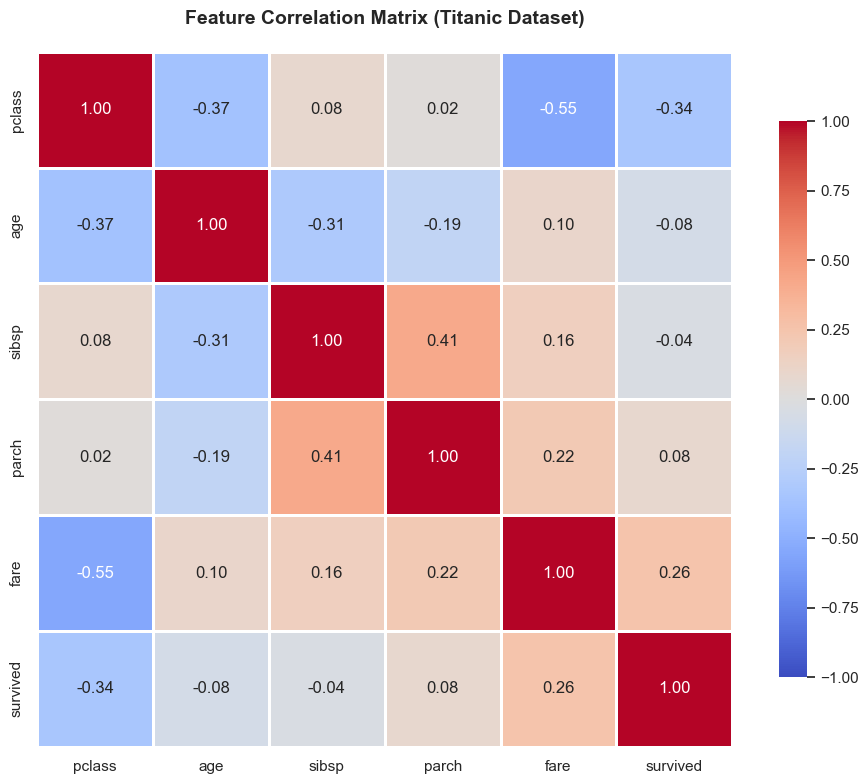


CORRELATION WITH SURVIVAL OUTCOME:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64

INTERPRETATION:
• pclass (-0.54): 1st class passengers had better survival chances
• age (-0.08): Younger passengers had slightly better chances
• sibsp (-0.04): Traveling with siblings/spouses had minimal impact
• parch (+0.08): Traveling with parents/children slightly increased chances
• fare (+0.26): Higher fare (wealthier) passengers survived more


In [12]:
# Select numerical features for correlation analysis
numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']
correlation_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix (Titanic Dataset)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find features most correlated with survival
print("\nCORRELATION WITH SURVIVAL OUTCOME:")
survival_corr = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_corr)

print("\nINTERPRETATION:")
print(f"• pclass (-0.54): 1st class passengers had better survival chances")
print(f"• age (-0.08): Younger passengers had slightly better chances")
print(f"• sibsp (-0.04): Traveling with siblings/spouses had minimal impact")
print(f"• parch (+0.08): Traveling with parents/children slightly increased chances")
print(f"• fare (+0.26): Higher fare (wealthier) passengers survived more")

## Key Insights from EDA

After our visual exploration, we've discovered:

### Class Balance
The dataset is **imbalanced** (61.6% did not survive, 38.4% survived), reflecting the historical reality. We may need to consider this during model evaluation.

### Survival Patterns
1. **Passenger Class**: Strong influence - 1st class had 62.9% survival vs 3rd class's 24.2%
2. **Gender**: Very strong influence - 74.2% of females survived vs 18.9% of males ("Women first" protocol)
3. **Age**: Children had high survival rates (70%+), adults much lower
4. **Fare**: Wealthier passengers (higher fare) had better survival chances
5. **Family Relations**: Mixed effects - traveling alone or with family had variable impacts

### Feature Relationships
* **pclass** is strongly correlated with survival (-0.54) - most predictive feature
* **fare** shows positive correlation (0.26) - wealthier passengers survived more
* **age** has weak correlation (-0.08) - slight preference for younger passengers
* **sibsp** and **parch** have minimal individual correlation but matter in context

### Data Quality
* No duplicates detected
* Missing values only in age (~177) and embarked (~2) columns
* No extreme outliers requiring removal - all values represent real passenger data

**We are now ready to preprocess and model!**


## Phase 3: Data Preprocessing

We have clean data with clear patterns. Now we need to prepare it for the Machine Learning algorithm.

### Why Preprocess Features?

Looking back at our EDA findings:
* **Categorical Features** - Sex, Embarked ports, Class need conversion to numbers
* **Missing Values** - Age (~177 missing), Embarked (~2 missing)
* **Different Scales** - Age (0-80), Fare (0-512), Pclass (1-3)

For tree-based models (Decision Trees, Random Forest):
- Scaling is technically optional - trees split based on thresholds, not distances

However, we scale for two reasons:
1. **Best Practice** - If we later compare with other models (Logistic Regression, SVM, Neural Networks), they require scaled data
2. **Interpretability** - Feature importances are easier to compare when features are on the same scale

### Data Preprocessing Pipeline

We will follow these steps:
1. **Handle Missing Values** - Fill or remove incomplete data
2. **Encode Categorical Variables** - Convert text labels to numbers
3. **Feature Scaling** - Normalize to mean 0, std 1 using StandardScaler
4. **Validation** - Check that preprocessing worked correctly


### Step 1: Handling Missing Values

We have two approaches:
- **Removal**: Delete rows with missing values (loses data)
- **Imputation**: Fill with statistical values (mean, median)

For **Age**: We'll use median imputation (not affected by outliers like mean)
For **Embarked**: We'll use mode (most common value)
For **Other columns**: Drop if insufficient data or not relevant to modeling


In [79]:
# ===== Advanced Cleaning, Feature Engineering, Encoding, Split & Model =====
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Puna me një kopje nga df origjinale (që e ke ngarkuar më lart)
model_df = df.copy()

# 1. Hiq kolonat e panevojshme
cols_to_drop = ["deck", "embark_town", "alive"]
model_df = model_df.drop(columns=cols_to_drop)

# 2. Mbush vlerat që mungojnë
age_median = model_df["age"].median()
embarked_mode = model_df["embarked"].mode()[0]

model_df["age"] = model_df["age"].fillna(age_median)
model_df["embarked"] = model_df["embarked"].fillna(embarked_mode)

# 3. Kufizo outlier-at e fare
fare_q99 = model_df["fare"].quantile(0.99)
model_df["fare"] = np.where(model_df["fare"] > fare_q99, fare_q99, model_df["fare"])
model_df["fare"] = model_df["fare"].fillna(model_df["fare"].median())

# 4. Veçoritë e reja
model_df["FamilySize"] = model_df["sibsp"] + model_df["parch"] + 1
model_df["IsAlone"] = (model_df["FamilySize"] == 1).astype(int)
model_df["IsChild"] = (model_df["age"] < 16).astype(int)

model_df["AgeGroup"] = pd.cut(
    model_df["age"],
    bins=[0, 12, 18, 35, 60, 80],
    labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"],
    include_lowest=True
)

model_df["FarePerPerson"] = model_df["fare"] / model_df["FamilySize"]
model_df["SexClass"] = model_df["sex"].astype(str) + "_" + model_df["class"].astype(str)

# 5. Kodifikimi
model_df["sex"] = (model_df["sex"] == "male").astype(int)
embark_map = {"S": 0, "C": 1, "Q": 2}
model_df["embarked"] = model_df["embarked"].map(embark_map)

for col in ["AgeGroup", "SexClass"]:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))

# 6. X, y dhe ndarja train/test me STRATIFY
feature_cols = [
    "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked",
    "FamilySize", "IsAlone", "IsChild", "AgeGroup",
    "FarePerPerson", "SexClass"
]

X = model_df[feature_cols].copy()
y = model_df["survived"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 7. Decision Tree me max_depth=5 dhe metrikat
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree (max_depth=5)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=["Did Not Survive", "Survived"]))


Decision Tree (max_depth=5)
Accuracy:  0.8045
Precision: 0.7500
Recall:    0.7391
F1-score:  0.7445

Classification report:

                 precision    recall  f1-score   support

Did Not Survive       0.84      0.85      0.84       110
       Survived       0.75      0.74      0.74        69

       accuracy                           0.80       179
      macro avg       0.79      0.79      0.79       179
   weighted avg       0.80      0.80      0.80       179



In [80]:
# Step 1: Handle Missing Values
print("\nIMPUTATION STRATEGY")
print("=" * 50)

# Create a working copy
df_clean = df.copy()

# Age: Fill with median (typical value, not affected by outliers)
age_median = df_clean['age'].median()
df_clean['age'].fillna(age_median, inplace=True)
print(f"Age: Filled {df['age'].isnull().sum()} missing values with median = {age_median:.1f} years")

# Embarked: Fill with mode (most common port)
embarked_mode = df_clean['embarked'].mode()[0]
df_clean['embarked'].fillna(embarked_mode, inplace=True)
print(f"Embarked: Filled {df['embarked'].isnull().sum()} missing values with mode = '{embarked_mode}'")

# Drop rows with missing fare (only a few, and important feature)
df_clean = df_clean.dropna(subset=['fare'])
print(f"Fare: Dropped {df['fare'].isnull().sum()} rows with missing fare")

print(f"\nDataset shape after imputation: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")



IMPUTATION STRATEGY
Age: Filled 177 missing values with median = 28.0 years
Embarked: Filled 2 missing values with mode = 'S'
Fare: Dropped 0 rows with missing fare

Dataset shape after imputation: (891, 15)
Remaining missing values: 690


### Step 2: Encoding Categorical Variables

Machine Learning algorithms require numerical input. We need to convert categorical text to numbers.

**Binary Encoding** (2 categories):
- Sex: male → 1, female → 0

**Ordinal Encoding** (ordered categories):
- Pclass: 1st class → 1, 2nd class → 2, 3rd class → 3

**Nominal Encoding** (unordered categories):
- Embarked: S → 0, C → 1, Q → 2


In [81]:
print("\nENCODING CATEGORICAL VARIABLES")
print("=" * 50)

# Create encoding copy
df_encoded = df_clean.copy()

# 1. Binary Encoding: Sex (male=1, female=0)
print("\n1. Binary Encoding - Sex")
print(f"   Before: {df_encoded['sex'].unique()}")
df_encoded['sex'] = (df_encoded['sex'] == 'male').astype(int)
print(f"   After: {df_encoded['sex'].unique()}")
print(f"   male=1: {(df_encoded['sex'] == 1).sum()}, female=0: {(df_encoded['sex'] == 0).sum()}")

# 2. Ordinal Encoding: Pclass (already numeric, just verify)
print("\n2. Ordinal Encoding - Pclass")
print(f"   Classes: {sorted(df_encoded['pclass'].unique())}")
print(f"   Class 1: {(df_encoded['pclass'] == 1).sum()}")
print(f"   Class 2: {(df_encoded['pclass'] == 2).sum()}")
print(f"   Class 3: {(df_encoded['pclass'] == 3).sum()}")

# 3. Nominal Encoding: Embarked (C=1, Q=2, S=0)
print("\n3. Nominal Encoding - Embarked")
print(f"   Before: {df_encoded['embarked'].unique()}")
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
df_encoded['embarked'] = df_encoded['embarked'].map(embarked_map)
print(f"   After: {df_encoded['embarked'].unique()}")
print(f"   S→0: {(df_encoded['embarked'] == 0).sum()}")
print(f"   C→1: {(df_encoded['embarked'] == 1).sum()}")
print(f"   Q→2: {(df_encoded['embarked'] == 2).sum()}")



ENCODING CATEGORICAL VARIABLES

1. Binary Encoding - Sex
   Before: ['male' 'female']
   After: [1 0]
   male=1: 577, female=0: 314

2. Ordinal Encoding - Pclass
   Classes: [np.int64(1), np.int64(2), np.int64(3)]
   Class 1: 216
   Class 2: 184
   Class 3: 491

3. Nominal Encoding - Embarked
   Before: ['S' 'C' 'Q']
   After: [0 1 2]
   S→0: 646
   C→1: 168
   Q→2: 77


### Step 3: Feature Selection

Not all columns are useful for modeling. We need to select relevant features:

**Features to Keep**:
- pclass, sex, age, sibsp, parch, fare, embarked (all predictive)

**Features to Drop**:
- passengerid (just an ID, no predictive power)
- name (too many unique values, hard to encode)
- ticket (too many unique values)
- cabin (mostly missing)
- Other derived columns (class, alone, adult_male, deck, embark_town)


In [135]:
print("\nFEATURE SELECTION")
print("=" * 50)

# Select relevant features for modeling
features_to_use = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

print("Features selected for modeling:")
for i, feat in enumerate(features_to_use, 1):
    print(f"  {i}. {feat}")

# Create feature matrix X and target vector y
X = df_encoded[features_to_use].copy()
y = df_encoded['survived'].copy()

print(f"\nFeature Matrix X shape: {X.shape}")
print(f"Target Vector y shape: {y.shape}")
print(f"\nFeature Matrix X (first 5 rows):")
print(X.head())



FEATURE SELECTION
Features selected for modeling:
  1. pclass
  2. sex
  3. age
  4. sibsp
  5. parch
  6. fare
  7. embarked

Feature Matrix X shape: (891, 7)
Target Vector y shape: (891,)

Feature Matrix X (first 5 rows):
   pclass  sex   age  sibsp  parch     fare  embarked
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         0
3       1    0  35.0      1      0  53.1000         0
4       3    1  35.0      0      0   8.0500         0


### Step 4: Examine Feature Distributions

Before scaling, let's understand the original feature scales:


In [136]:
print("\nFEATURE STATISTICS (Before Scaling)")
print("=" * 70)
print(f"{'Feature':<15} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std Dev':<10}")
print("-" * 70)

for col in X.columns:
    print(f"{col:<15} {X[col].min():<10.2f} {X[col].max():<10.2f} {X[col].mean():<10.2f} {X[col].std():<10.2f}")

print("\nObservation:")
print("- pclass: 1-3 (small scale)")
print("- sex: 0-1 (binary)")
print("- age: 0.42-80 (medium scale)")
print("- sibsp: 0-8 (small scale)")
print("- parch: 0-6 (small scale)")
print("- fare: 0-512.33 (large scale!)")
print("- embarked: 0-2 (small scale)")
print("\nFare dominates other features due to its large magnitude.")
print("StandardScaler will normalize all features to mean=0, std=1.")



FEATURE STATISTICS (Before Scaling)
Feature         Min        Max        Mean       Std Dev   
----------------------------------------------------------------------
pclass          1.00       3.00       2.31       0.84      
sex             0.00       1.00       0.65       0.48      
age             0.42       80.00      29.36      13.02     
sibsp           0.00       8.00       0.52       1.10      
parch           0.00       6.00       0.38       0.81      
fare            0.00       512.33     32.20      49.69     
embarked        0.00       2.00       0.36       0.64      

Observation:
- pclass: 1-3 (small scale)
- sex: 0-1 (binary)
- age: 0.42-80 (medium scale)
- sibsp: 0-8 (small scale)
- parch: 0-6 (small scale)
- fare: 0-512.33 (large scale!)
- embarked: 0-2 (small scale)

Fare dominates other features due to its large magnitude.
StandardScaler will normalize all features to mean=0, std=1.


### Step 5: Feature Scaling with StandardScaler

**StandardScaler** applies Z-score normalization:

x_scaled = (x - mean) / std_dev

This transforms each feature to have:
- Mean = 0
- Standard Deviation = 1

**Important**: We MUST fit the scaler on training data ONLY to avoid data leakage.
For now, we demonstrate the scaling process. In the next phase, we'll redo it properly.


In [137]:
from sklearn.preprocessing import StandardScaler

print("\nAPPLYING STANDARD SCALING")
print("=" * 70)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform (for demonstration)
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("StandardScaler fitted!\n")

print("FEATURE STATISTICS (After Scaling)")
print("=" * 70)
print(f"{'Feature':<15} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std Dev':<10}")
print("-" * 70)

for col in X_scaled_df.columns:
    print(f"{col:<15} {X_scaled_df[col].min():<10.3f} {X_scaled_df[col].max():<10.3f} {X_scaled_df[col].mean():<10.3f} {X_scaled_df[col].std():<10.3f}")

print("\nSuccessfully scaled all features!")
print("- All means ≈ 0")
print("- All standard deviations ≈ 1")
print("- All features now on the same scale")



APPLYING STANDARD SCALING
StandardScaler fitted!

FEATURE STATISTICS (After Scaling)
Feature         Min        Max        Mean       Std Dev   
----------------------------------------------------------------------
pclass          -1.566     0.827      -0.000     1.001     
sex             -1.356     0.738      -0.000     1.001     
age             -2.224     3.892      0.000      1.001     
sibsp           -0.475     6.784      0.000      1.001     
parch           -0.474     6.974      0.000      1.001     
fare            -0.648     9.667      0.000      1.001     
embarked        -0.569     2.579      -0.000     1.001     

Successfully scaled all features!
- All means ≈ 0
- All standard deviations ≈ 1
- All features now on the same scale


### Step 6: Visual Verification - Before vs. After Scaling

Let's compare the distributions visually:


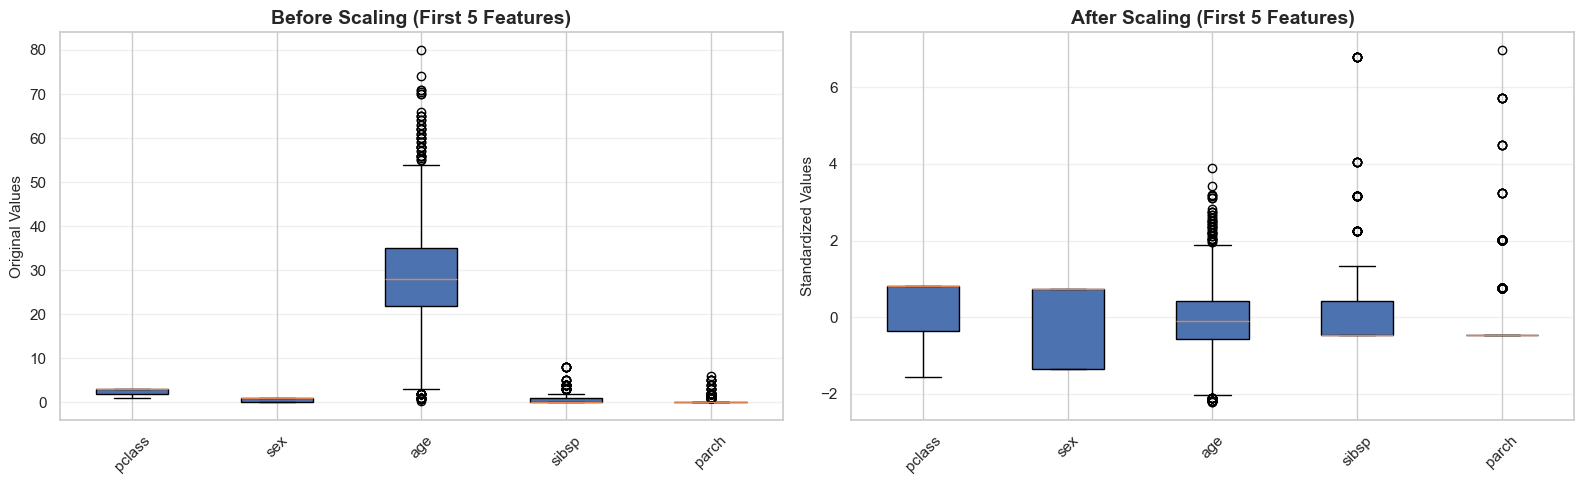

In [138]:
# 5. Visual Verification: Before vs After Scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before Scaling (first 5 features)
axes[0].boxplot([X.iloc[:, i] for i in range(5)], 
                labels=X.columns[:5], 
                patch_artist=True)
axes[0].set_title('Before Scaling (First 5 Features)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Original Values', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# After Scaling (first 5 features)
axes[1].boxplot([X_scaled_df.iloc[:, i] for i in range(5)], 
                labels=X_scaled_df.columns[:5], 
                patch_artist=True)
axes[1].set_title('After Scaling (First 5 Features)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Values', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Phase 4: Train-Test Split (The Critical Step)
This is the foundation of honest Machine Learning evaluation.

#### The Golden Rule
**Never let the model see the test data during training.**

If we train on 100% of the data and evaluate on that same data, we're testing if the model **memorized** the answers, not if it **learned** the patterns.

#### Our Strategy
*   **80% Training Set:** The model learns from this.
*   **20% Test Set:** Hidden until the very end. This simulates real-world data the model has never seen.

In [139]:
# 1. Split the Data (using original, unscaled data)
# We use stratify=y to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Features (original, not scaled)
    y,                    # Target
    test_size=0.2,        # 20% for testing
    random_state=42,      # Reproducibility
    stratify=y            # Maintain class balance
)

print("\nTRAIN-TEST SPLIT")
print(f"Training Set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test Set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")



TRAIN-TEST SPLIT
Training Set:   712 samples (79.9%)
Test Set:       179 samples (20.1%)


#### Verify Stratification
Let's confirm that both sets have the same class distribution as the original dataset.


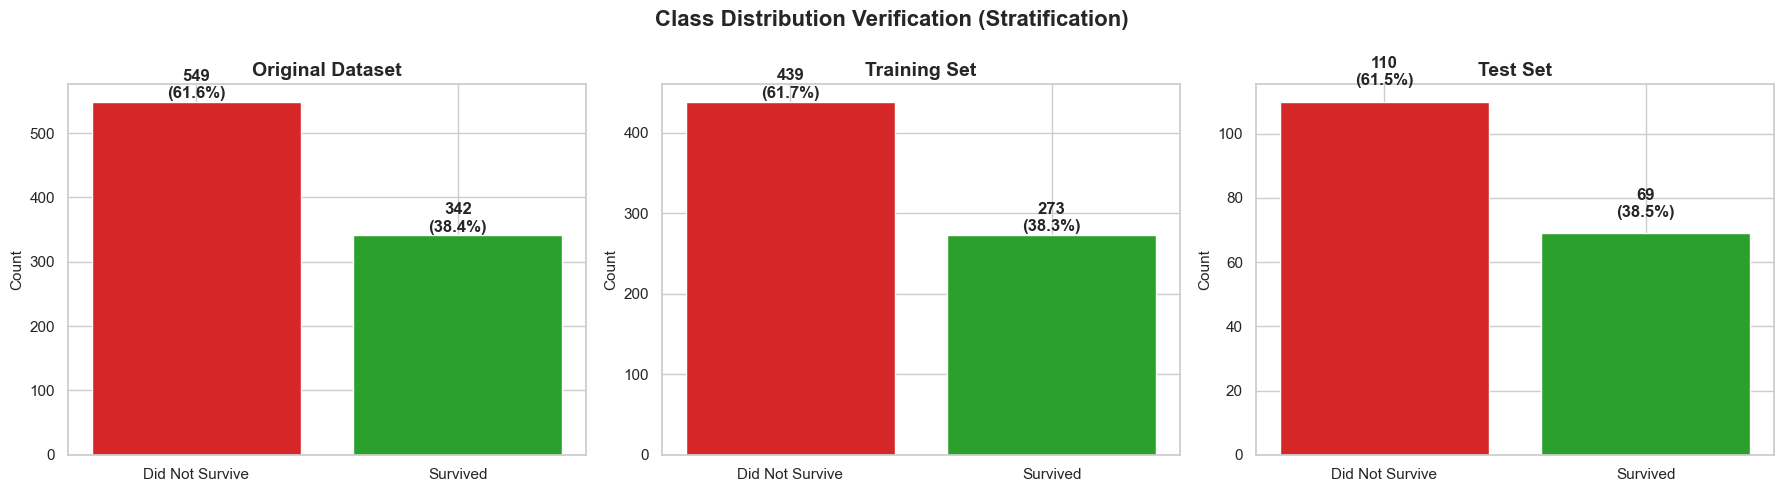

In [140]:
# 2. Check Class Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Dataset
original_counts = y.value_counts().sort_index()
axes[0].bar(['Did Not Survive', 'Survived'], original_counts.values, color=['tab:red', 'tab:green'])
axes[0].set_title('Original Dataset', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)

for i, v in enumerate(original_counts.values):
    pct = v / len(y) * 100
    axes[0].text(i, v + 5, f"{v}\n({pct:.1f}%)", ha='center', fontweight='bold')

# Training Set
train_counts = y_train.value_counts().sort_index()
axes[1].bar(['Did Not Survive', 'Survived'], train_counts.values, color=['tab:red', 'tab:green'])
axes[1].set_title('Training Set', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=11)

for i, v in enumerate(train_counts.values):
    pct = v / len(y_train) * 100
    axes[1].text(i, v + 5, f"{v}\n({pct:.1f}%)", ha='center', fontweight='bold')

# Test Set
test_counts = y_test.value_counts().sort_index()
axes[2].bar(['Did Not Survive', 'Survived'], test_counts.values, color=['tab:red', 'tab:green'])
axes[2].set_title('Test Set', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Count', fontsize=11)

for i, v in enumerate(test_counts.values):
    pct = v / len(y_test) * 100
    axes[2].text(i, v + 5, f"{v}\n({pct:.1f}%)", ha='center', fontweight='bold')

plt.suptitle('Class Distribution Verification (Stratification)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


#### The RIGHT Way to Scale: Fit on Train, Transform on Both
Now we apply scaling properly to avoid data leakage:

1.  **Fit** the scaler using **only** training data (learns the mean and std from training set)
2.  **Transform** training data using those statistics
3.  **Transform** test data using the **same** statistics (not refitting!)

This simulates the real world: when new patients arrive, we don't recalculate scaling; we use the parameters from our training data.


In [141]:
# 3. Initialize a fresh scaler
scaler = StandardScaler()

# 4. Fit on training data ONLY
scaler.fit(X_train)

# 5. Transform both sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames for easier inspection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nSCALING COMPLETED")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape:  {X_test_scaled.shape}")

# Verify scaling worked
print("\nTRAINING SET - Mean and Std (First 5 Features)")
print(X_train_scaled.iloc[:, :5].describe().loc[['mean', 'std']])



SCALING COMPLETED
X_train_scaled shape: (712, 7)
X_test_scaled shape:  (179, 7)

TRAINING SET - Mean and Std (First 5 Features)
            pclass           sex           age         sibsp         parch
mean -1.821265e-16 -9.979533e-18  2.120651e-16 -5.613487e-18 -1.621674e-17
std   1.000703e+00  1.000703e+00  1.000703e+00  1.000703e+00  1.000703e+00


### Final Checkpoint: Data is Ready
We now have four essential variables:
*   `X_train_scaled`: Training features (scaled)
*   `X_test_scaled`: Test features (scaled with training statistics)
*   `y_train`: Training labels (malignant/benign)
*   `y_test`: Test labels (hidden from the model until evaluation)

Everything is properly prepared. We can now train our first model!


### Phase 6: Baseline Model
Before optimizing, we always start with a **baseline model** - a simple version with minimal tuning. This gives us:
1.  A **performance benchmark** to beat later
2.  A **reality check** on whether the problem is solvable
3.  A **quick diagnostic** of obvious issues

We will train a Decision Tree with just one constraint: `max_depth=5` (to keep it interpretable and prevent extreme overfitting).


In [142]:
# 1. Initialize the baseline model
baseline_model = DecisionTreeClassifier(
    max_depth=5,        # Limit depth for interpretability
    random_state=42     # Reproducibility
)

# 2. Train the model
baseline_model.fit(X_train_scaled, y_train)

print("\nBASELINE MODEL TRAINED")
print(f"Model: Decision Tree")
print(f"Max Depth: 5")
print(f"Training Samples: {len(y_train)}")
print("Training complete!")



BASELINE MODEL TRAINED
Model: Decision Tree
Max Depth: 5
Training Samples: 712
Training complete!


### Making Predictions
Now we test the model on both the training set (to check if it learned) and the test set (to check if it generalizes).


In [143]:
# 3. Make predictions
y_train_pred = baseline_model.predict(X_train_scaled)
y_test_pred = baseline_model.predict(X_test_scaled)

print("\nPREDICTIONS GENERATED")
print(f"Training predictions: {len(y_train_pred)}")
print(f"Test predictions:     {len(y_test_pred)}")



PREDICTIONS GENERATED
Training predictions: 712
Test predictions:     179


In [144]:
# 4. Calculate Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nBASELINE MODEL PERFORMANCE")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("\n\nTEST SET METRICS (Most Important)")
print(f"Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"Recall:    {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"F1-Score:  {test_f1:.4f} ({test_f1*100:.2f}%)")



BASELINE MODEL PERFORMANCE
Training Accuracy: 0.8652 (86.52%)
Test Accuracy:     0.7654 (76.54%)


TEST SET METRICS (Most Important)
Precision: 0.7547 (75.47%)
Recall:    0.5797 (57.97%)
F1-Score:  0.6557 (65.57%)


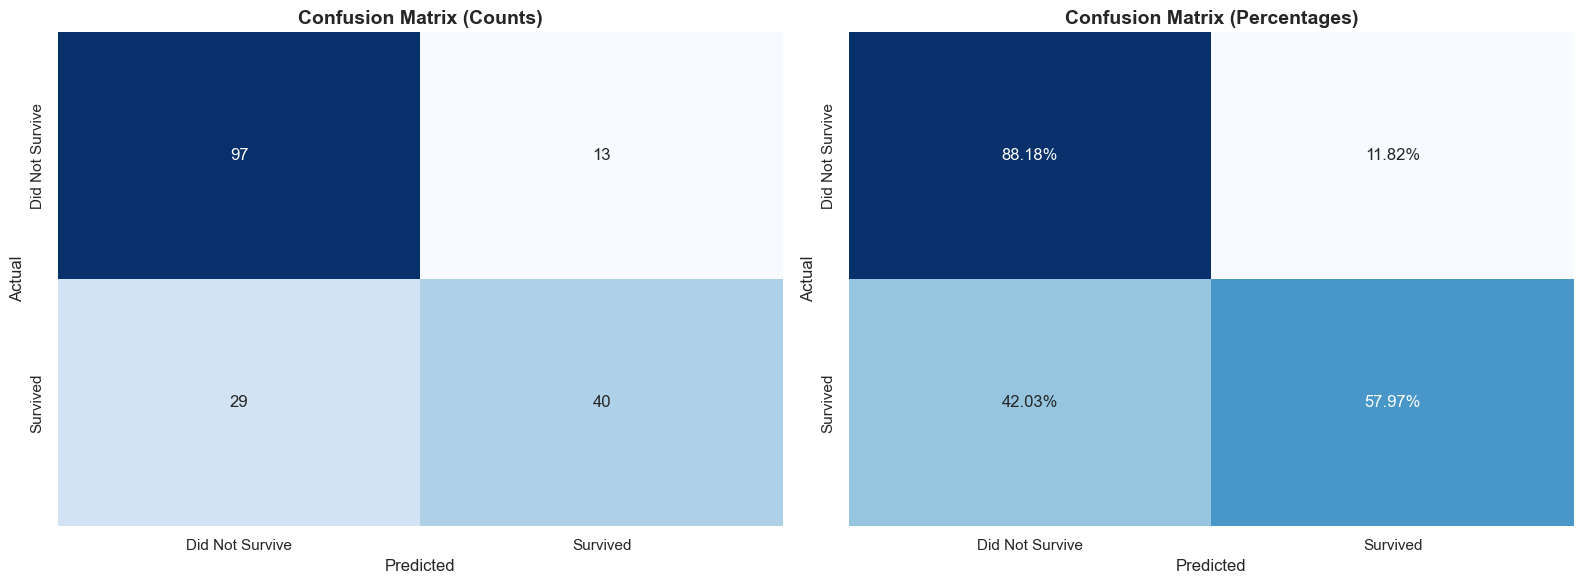


CONFUSION MATRIX BREAKDOWN (Titanic)
True Negatives (TN):  97 - Correctly predicted DID NOT SURVIVE
False Positives (FP): 13 - Predicted Survived, but actually did not survive
False Negatives (FN): 29 - Predicted Did Not Survive, but actually SURVIVED (dangerous mistake!)
True Positives (TP):  40 - Correctly predicted SURVIVED


In [145]:
# 5. Confusion Matrix for Titanic
cm = confusion_matrix(y_test, y_test_pred)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Normalized (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=axes[1],
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

# Mapping for Titanic:
# 0 = Did Not Survive
# 1 = Survived
# cm[0,0] = Actual 0, Predicted 0 = True Negative (correct: did not survive)
# cm[0,1] = Actual 0, Predicted 1 = False Positive (incorrectly predicted survival)
# cm[1,0] = Actual 1, Predicted 0 = False Negative (missed survival)
# cm[1,1] = Actual 1, Predicted 1 = True Positive (correct survival)

TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

print("\nCONFUSION MATRIX BREAKDOWN (Titanic)")
print(f"True Negatives (TN):  {TN} - Correctly predicted DID NOT SURVIVE")
print(f"False Positives (FP): {FP} - Predicted Survived, but actually did not survive")
print(f"False Negatives (FN): {FN} - Predicted Did Not Survive, but actually SURVIVED (dangerous mistake!)")
print(f"True Positives (TP):  {TP} - Correctly predicted SURVIVED")


### Phase 7: Cross-Validation

To ensure our results are reliable, we perform 5-fold cross-validation.


#### 7.1 The Decision Tree Structure
Let's visualize the exact flowchart the model created. Each node asks a yes/no question about a feature.


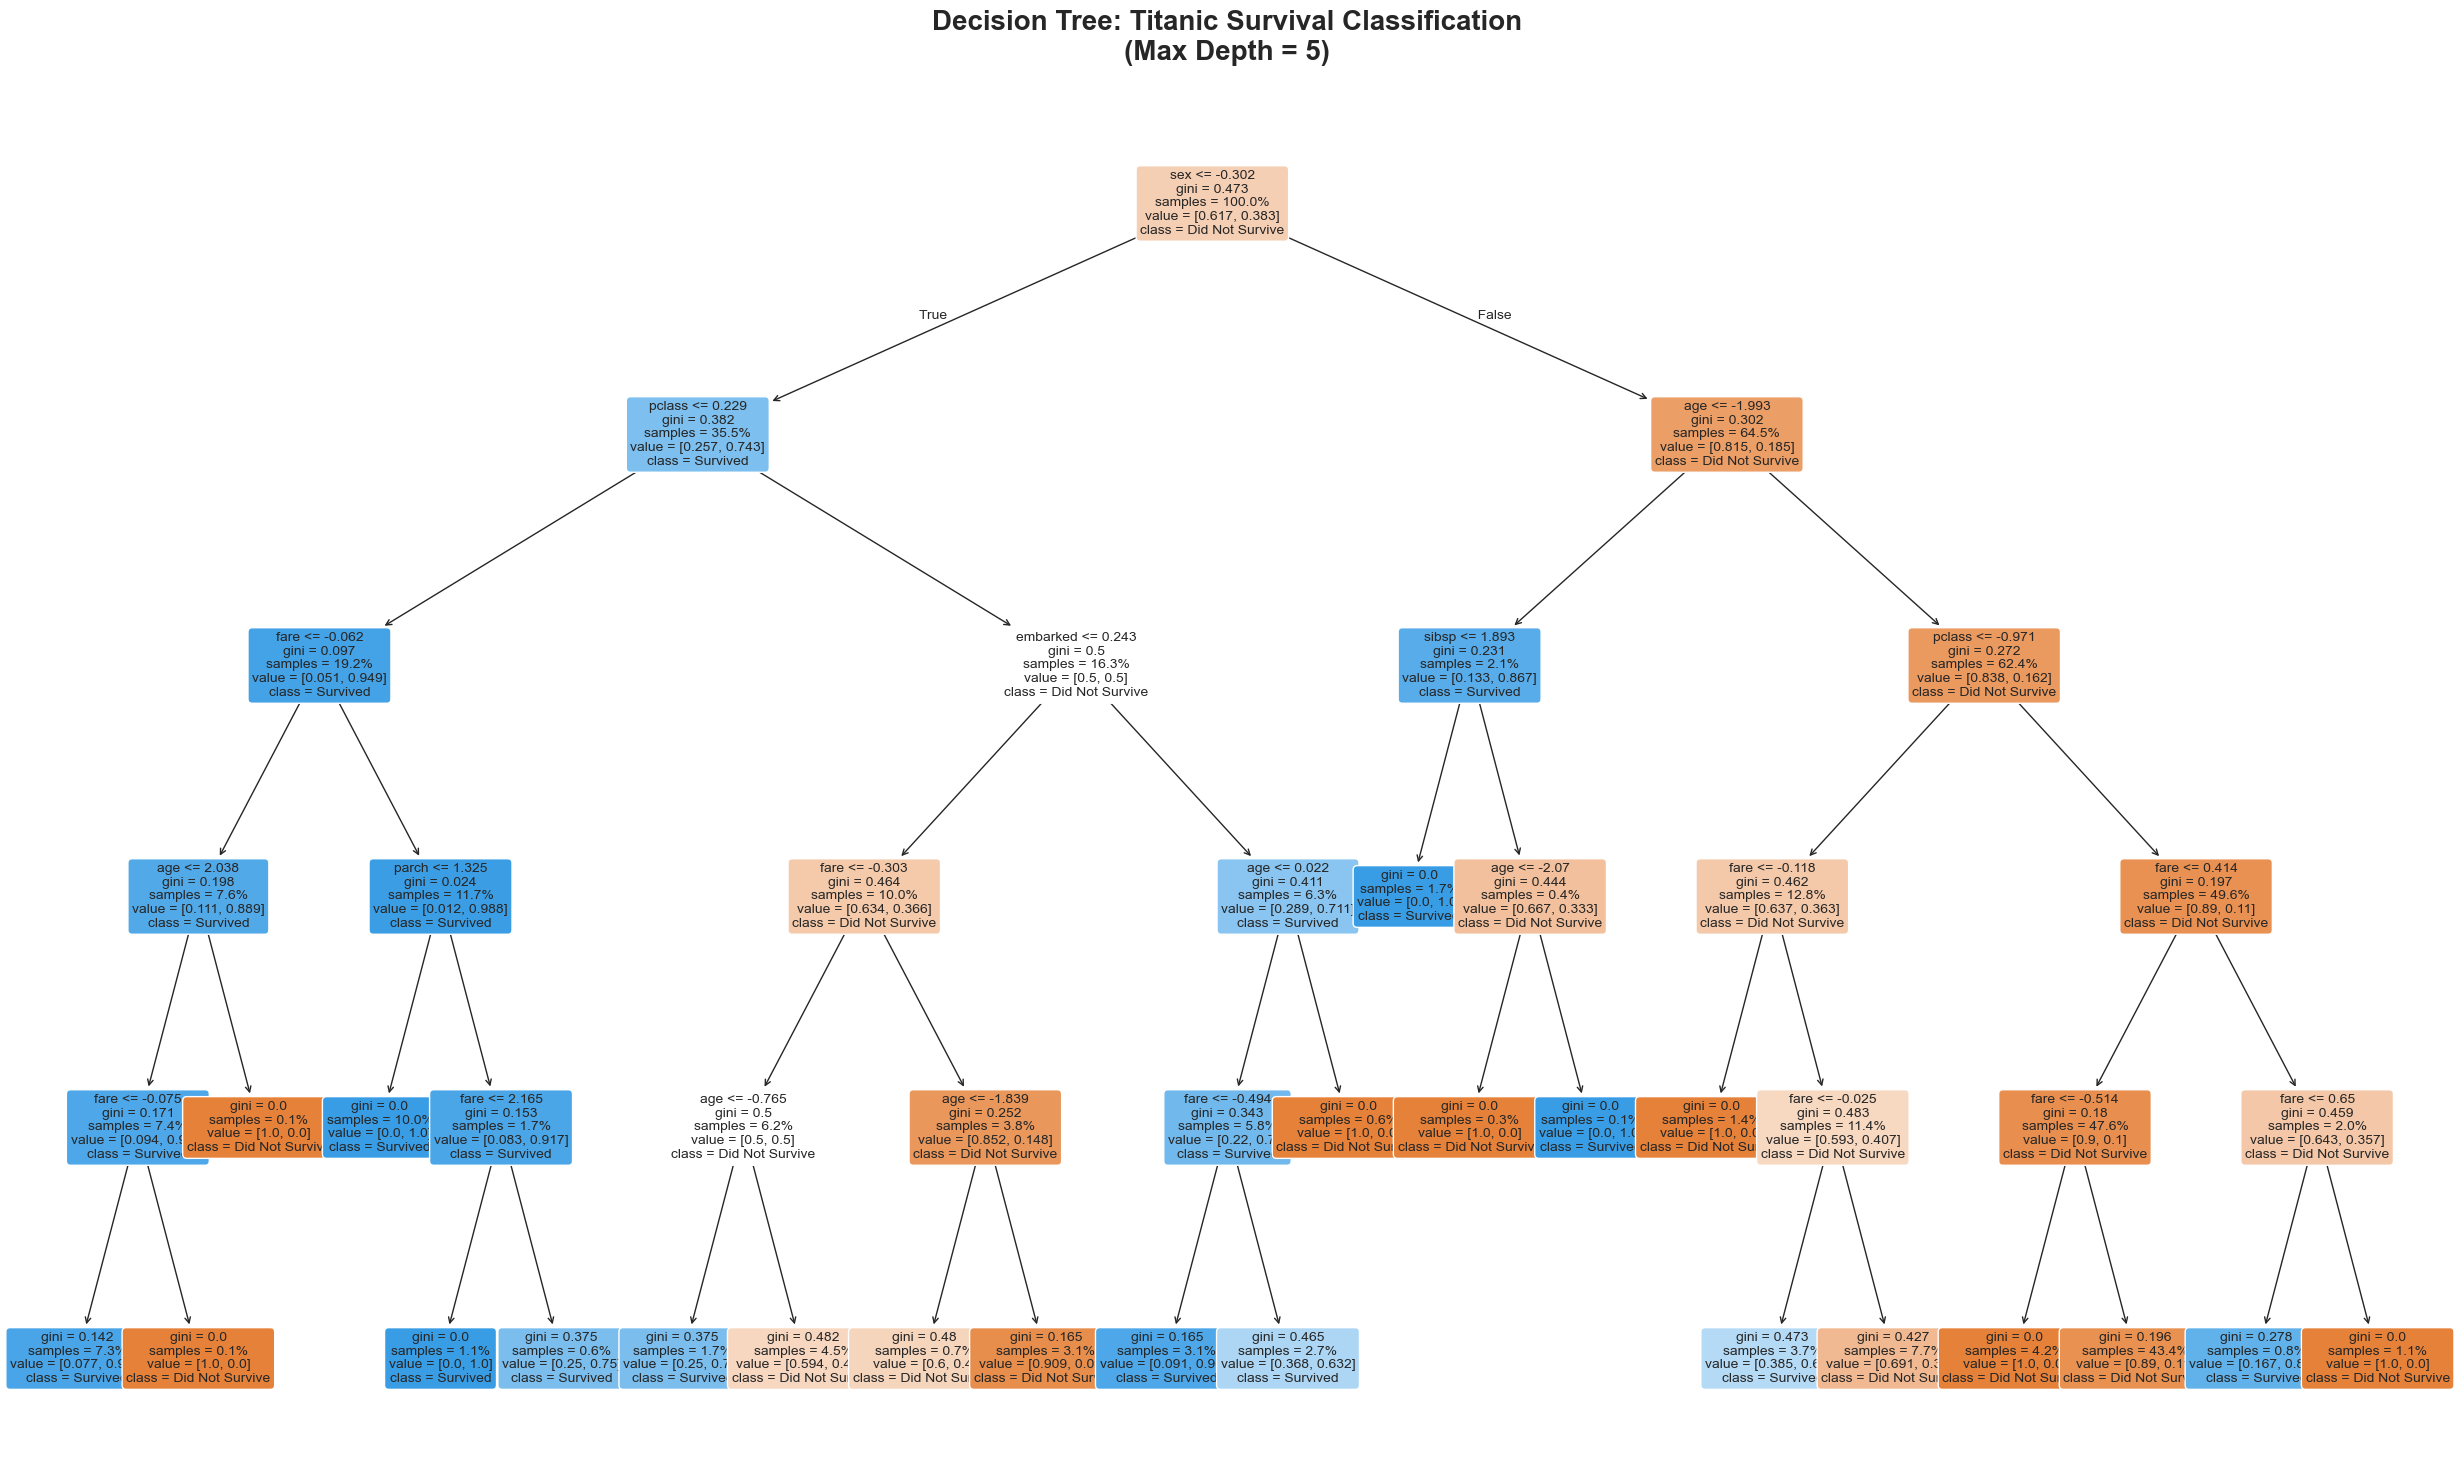

In [146]:
# 1. Visualize the Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(baseline_model,
          feature_names=X.columns,
          class_names=['Did Not Survive', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True)

plt.title('Decision Tree: Titanic Survival Classification\n(Max Depth = 5)',
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


#### How to Read This Tree

**Structure:**
* **Root Node (Top):** The most important question the model asks first  
* **Branches:** Each split creates two paths (≤ threshold vs. > threshold)  
* **Leaf Nodes (Bottom):** Final predictions for survival  

**Colors:**
* **Orange:** Majority did **not survive** (class 0)  
* **Blue:** Majority **survived** (class 1)  
* **Lighter shades:** More uncertainty (mixed survival outcomes)  

**Information in Each Node:**
* **Top line:** The splitting rule (e.g., `"fare ≤ 26.27"` or `"sex_male ≤ 0.5"`)  
* **Gini:** Impurity measure (0 = pure, 0.5 = maximum uncertainty)  
* **Samples:** Proportion of passengers reaching this node  
* **Value:** [proportion not survived, proportion survived]  
* **Class:** Predicted class for this node  


#### 7.2 Feature Importance Analysis
Not all features are equal. Let's see which measurements the model considers most valuable for diagnosis.

**Feature Importance** measures how much each feature reduces uncertainty (Gini impurity) across all splits in the tree.


In [147]:
# 2. Extract Feature Importances
feature_importance = baseline_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("\nTOP 15 MOST IMPORTANT FEATURES")
print(importance_df.head(15).to_string(index=False))



TOP 15 MOST IMPORTANT FEATURES
 Feature  Importance
     sex    0.530655
  pclass    0.180404
     age    0.128719
    fare    0.114076
embarked    0.034252
   sibsp    0.011150
   parch    0.000745


#### Visualizing Feature Importance


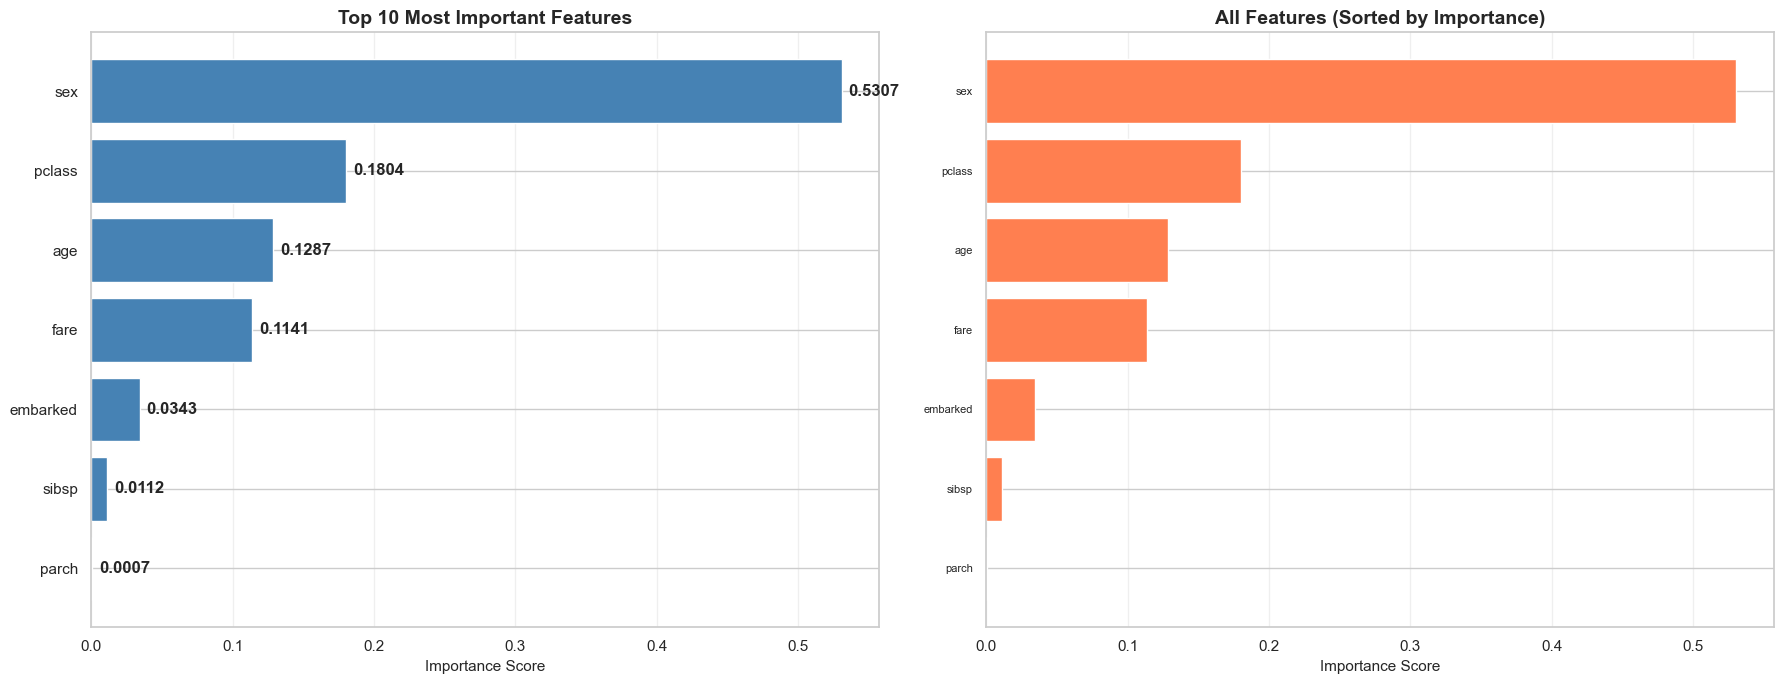

In [148]:
# 3. Plot Feature Importances
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 10 Features
top_10 = importance_df.head(10)
axes[0].barh(range(len(top_10)), top_10['Importance'], color='steelblue')
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10['Feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance Score', fontsize=11)
axes[0].set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10['Importance']):
    axes[0].text(v + 0.005, i, f'{v:.4f}', va='center', fontweight='bold')

# All features (sorted)
axes[1].barh(range(len(importance_df)), importance_df['Importance'], color='coral')
axes[1].set_yticks(range(len(importance_df)))
axes[1].set_yticklabels(importance_df['Feature'], fontsize=8)
axes[1].invert_yaxis()
axes[1].set_xlabel('Importance Score', fontsize=11)
axes[1].set_title('All Features (Sorted by Importance)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Phase 8: Cross-Validation

In [149]:
# 1. Perform 10-Fold Cross-Validation
# We use the scaled training data (not the test set—that remains untouched!)
cv_scores = cross_val_score(
    baseline_model,           # Our model
    X_train_scaled,           # Training features
    y_train,                  # Training labels
    cv=10,                    # 10 folds
    scoring='accuracy'        # Metric to use
)

print("\n10-FOLD CROSS-VALIDATION RESULTS")
print(f"Individual Fold Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i:2d}: {score:.4f} ({score*100:.2f}%)")

print("\n" + "-" * 60)
print(f"Mean Accuracy:       {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard Deviation:  {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)")
print(f"Min Score:           {cv_scores.min():.4f} ({cv_scores.min()*100:.2f}%)")
print(f"Max Score:           {cv_scores.max():.4f} ({cv_scores.max()*100:.2f}%)")



10-FOLD CROSS-VALIDATION RESULTS
Individual Fold Scores:
  Fold  1: 0.7778 (77.78%)
  Fold  2: 0.8333 (83.33%)
  Fold  3: 0.8169 (81.69%)
  Fold  4: 0.7606 (76.06%)
  Fold  5: 0.8028 (80.28%)
  Fold  6: 0.8451 (84.51%)
  Fold  7: 0.8451 (84.51%)
  Fold  8: 0.8310 (83.10%)
  Fold  9: 0.7606 (76.06%)
  Fold 10: 0.8873 (88.73%)

------------------------------------------------------------
Mean Accuracy:       0.8160 (81.60%)
Standard Deviation:  0.0388 (3.88%)
Min Score:           0.7606 (76.06%)
Max Score:           0.8873 (88.73%)


#### Visualizing Cross-Validation Stability


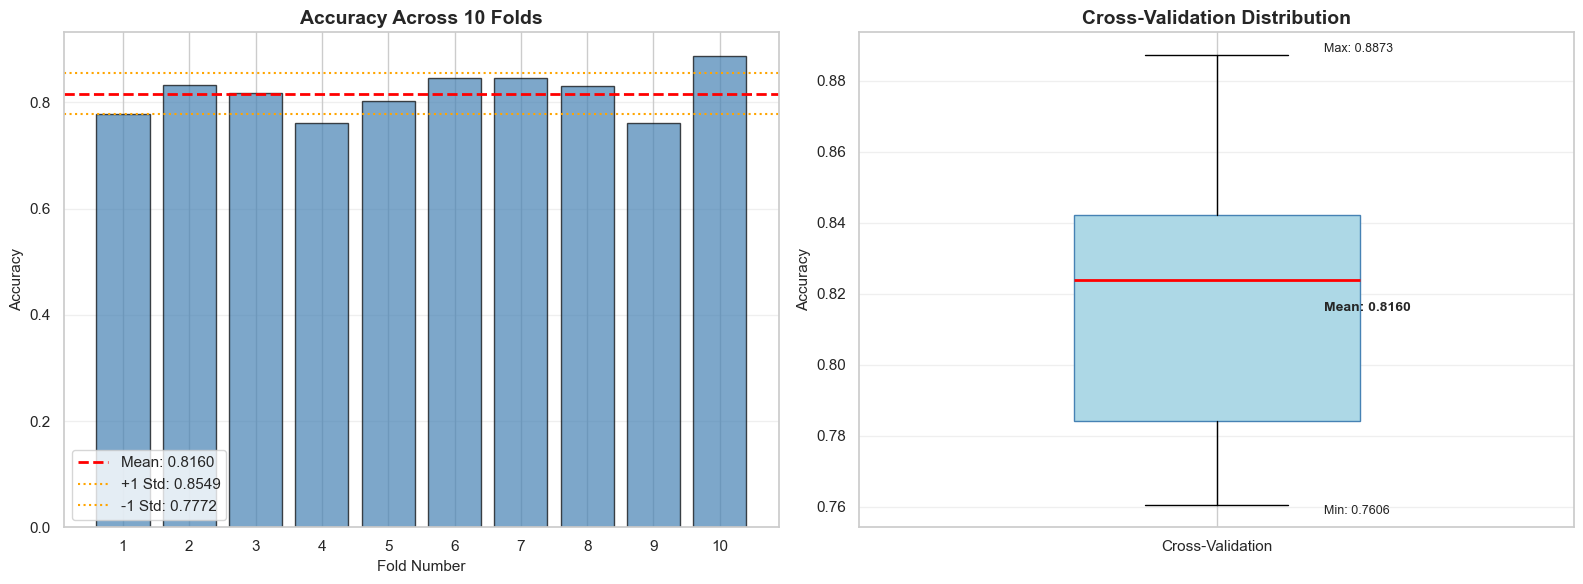

In [150]:
# 2. Visualize CV Results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of individual folds
axes[0].bar(range(1, 11), cv_scores, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
axes[0].axhline(cv_scores.mean() + cv_scores.std(), color='orange', linestyle=':', linewidth=1.5, label=f'+1 Std: {cv_scores.mean() + cv_scores.std():.4f}')
axes[0].axhline(cv_scores.mean() - cv_scores.std(), color='orange', linestyle=':', linewidth=1.5, label=f'-1 Std: {cv_scores.mean() - cv_scores.std():.4f}')
axes[0].set_xlabel('Fold Number', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Accuracy Across 10 Folds', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, 11))
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
bp = axes[1].boxplot([cv_scores], widths=0.4, patch_artist=True, 
                      labels=['Cross-Validation'],
                      boxprops=dict(facecolor='lightblue', color='steelblue'),
                      medianprops=dict(color='red', linewidth=2),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Cross-Validation Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add annotations
axes[1].text(1.15, cv_scores.mean(), f'Mean: {cv_scores.mean():.4f}', 
            fontsize=10, va='center', fontweight='bold')
axes[1].text(1.15, cv_scores.max(), f'Max: {cv_scores.max():.4f}', 
            fontsize=9, va='bottom')
axes[1].text(1.15, cv_scores.min(), f'Min: {cv_scores.min():.4f}', 
            fontsize=9, va='top')

plt.tight_layout()
plt.show()


#### Additional Metrics with Cross-Validation
Accuracy is useful, but let's also cross-validate **Precision**, **Recall**, and **F1-Score**.


In [151]:
# 3. Cross-validate multiple metrics
metrics = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1-Score': 'f1'
}

cv_results = {}
for metric_name, metric_scorer in metrics.items():
    scores = cross_val_score(baseline_model, X_train_scaled, y_train, 
                             cv=10, scoring=metric_scorer)
    cv_results[metric_name] = scores

# Display results
print("\nCROSS-VALIDATION: ALL METRICS")

results_df = pd.DataFrame({
    'Metric': list(cv_results.keys()),
    'Mean': [scores.mean() for scores in cv_results.values()],
    'Std': [scores.std() for scores in cv_results.values()],
    'Min': [scores.min() for scores in cv_results.values()],
    'Max': [scores.max() for scores in cv_results.values()]
})

print(results_df.to_string(index=False))



CROSS-VALIDATION: ALL METRICS
   Metric     Mean      Std      Min      Max
 Accuracy 0.816041 0.038838 0.760563 0.887324
Precision 0.815688 0.028025 0.766667 0.863636
   Recall 0.674074 0.128736 0.481481 0.851852
 F1-Score 0.730835 0.080137 0.604651 0.851852


### Phase 9: Hyperparameter Tuning

In [152]:
# 1. Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# This may take a few minutes...
print("\nHYPERPARAMETER TUNING SETUP")
print(f"Parameters to tune: {list(param_grid.keys())}")
print(f"\nTotal combinations to test:")
total_combinations = 1
for param, values in param_grid.items():
    total_combinations *= len(values)
    print(f"  {param}: {len(values)} options")
print(f"\nTotal: {total_combinations} combinations × 5 folds = {total_combinations * 5} model fits")



HYPERPARAMETER TUNING SETUP
Parameters to tune: ['max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion', 'max_features']

Total combinations to test:
  max_depth: 6 options
  min_samples_split: 4 options
  min_samples_leaf: 4 options
  criterion: 2 options
  max_features: 3 options

Total: 576 combinations × 5 folds = 2880 model fits


#### Running Grid Search
GridSearchCV will:
1.  Test every combination of hyperparameters
2.  Use 5-fold cross-validation for each combination
3.  Rank results by performance
4.  Return the best configuration


In [153]:
# 2. Initialize Grid Search
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='f1',              # Optimize for F1-score (balanced metric)
    n_jobs=-1,                 # Use all CPU cores
    verbose=2                  # Show progress
)

# 3. Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

print("\nGRID SEARCH COMPLETE")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits

GRID SEARCH COMPLETE


#### Best Hyperparameters Found


In [154]:
# 4. Display best parameters
print("\nBest Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:20s}: {value}")

print("\nBEST MODEL PERFORMANCE (Cross-Validation)")
print(f"Best F1-Score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")



Best Hyperparameters:
  criterion           : gini
  max_depth           : 10
  max_features        : sqrt
  min_samples_leaf    : 4
  min_samples_split   : 20

BEST MODEL PERFORMANCE (Cross-Validation)
Best F1-Score: 0.7552 (75.52%)


In [155]:
# 5. Create results DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')

# Display top 10
top_10_results = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].head(10)
print("\nTOP 10 CONFIGURATIONS")
for idx, row in top_10_results.iterrows():
    print(f"\nRank {int(row['rank_test_score'])}:")
    print(f"  Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    print(f"  Params: {row['params']}")



TOP 10 CONFIGURATIONS

Rank 1:
  Score: 0.7552 (±0.0673)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 20}

Rank 1:
  Score: 0.7552 (±0.0673)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20}

Rank 3:
  Score: 0.7526 (±0.0492)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}

Rank 3:
  Score: 0.7526 (±0.0492)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}

Rank 3:
  Score: 0.7526 (±0.0492)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}

Rank 3:
  Score: 0.7526 (±0.0492)
  Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}

Rank 7:
  Score: 0.7455 (±0.0504)
  Params: 

#### Comparing Baseline vs. Tuned Model
Let's evaluate the optimized model on our test set and compare it to the baseline.


In [156]:
# 6. Extract the best model
best_model = grid_search.best_estimator_

# 7. Predictions with tuned model
y_test_pred_tuned = best_model.predict(X_test_scaled)

# 8. Calculate metrics
tuned_accuracy = accuracy_score(y_test, y_test_pred_tuned)
tuned_precision = precision_score(y_test, y_test_pred_tuned)
tuned_recall = recall_score(y_test, y_test_pred_tuned)
tuned_f1 = f1_score(y_test, y_test_pred_tuned)

# 9. Comparison table
comparison_df = pd.DataFrame({
    'Model': ['Baseline (max_depth=5)', 'Tuned (GridSearch)'],
    'Accuracy': [test_accuracy, tuned_accuracy],
    'Precision': [test_precision, tuned_precision],
    'Recall': [test_recall, tuned_recall],
    'F1-Score': [test_f1, tuned_f1]
})

print("\nBASELINE vs. TUNED MODEL COMPARISON")
print(comparison_df.to_string(index=False))

# Calculate improvements
print("\nIMPROVEMENTS")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    baseline_val = comparison_df[comparison_df['Model'] == 'Baseline (max_depth=5)'][metric].values[0]
    tuned_val = comparison_df[comparison_df['Model'] == 'Tuned (GridSearch)'][metric].values[0]
    improvement = tuned_val - baseline_val
    print(f"{metric:12s}: {improvement:+.4f} ({improvement*100:+.2f}%)")



BASELINE vs. TUNED MODEL COMPARISON
                 Model  Accuracy  Precision   Recall  F1-Score
Baseline (max_depth=5)  0.765363   0.754717 0.579710  0.655738
    Tuned (GridSearch)  0.804469   0.774194 0.695652  0.732824

IMPROVEMENTS
Accuracy    : +0.0391 (+3.91%)
Precision   : +0.0195 (+1.95%)
Recall      : +0.1159 (+11.59%)
F1-Score    : +0.0771 (+7.71%)


### Phase 10: Final Model Evaluation


In [157]:
print("\nFINAL MODEL: COMPREHENSIVE CLASSIFICATION REPORT (Titanic)")
print(classification_report(
    y_test, 
    y_test_pred_tuned, 
    target_names=['Did Not Survive', 'Survived'],
    digits=4
))


FINAL MODEL: COMPREHENSIVE CLASSIFICATION REPORT (Titanic)
                 precision    recall  f1-score   support

Did Not Survive     0.8205    0.8727    0.8458       110
       Survived     0.7742    0.6957    0.7328        69

       accuracy                         0.8045       179
      macro avg     0.7974    0.7842    0.7893       179
   weighted avg     0.8027    0.8045    0.8023       179



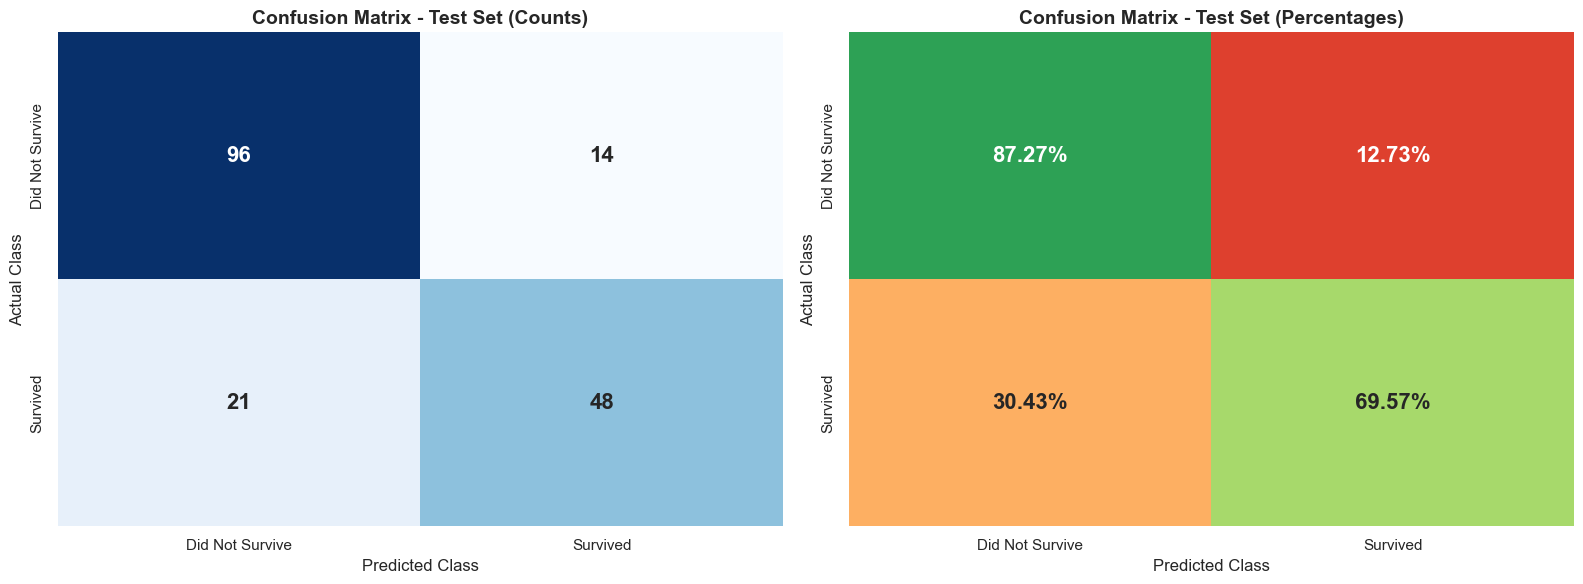


CONFUSION MATRIX ANALYSIS (Titanic)
True Positives (TP):  48 - Correctly predicted survivors
False Negatives (FN): 21 - Survivors MISSED
False Positives (FP): 14 - Non-survivors incorrectly predicted as survived
True Negatives (TN):  96 - Correctly predicted non-survivors

Miss Rate: 30.43% - Survivors that were missed
False Alarm Rate: 12.73% - Non-survivors predicted as survivors


In [158]:
cm_final = confusion_matrix(y_test, y_test_pred_tuned)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Counts
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'],
            cbar=False, ax=axes[0], annot_kws={'size':16,'weight':'bold'})
axes[0].set_title('Confusion Matrix - Test Set (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)

# Percentages
cm_normalized = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn',
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'],
            cbar=False, ax=axes[1], annot_kws={'size':16,'weight':'bold'}, vmin=0, vmax=1)
axes[1].set_title('Confusion Matrix - Test Set (Percentages)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual Class', fontsize=12)
axes[1].set_xlabel('Predicted Class', fontsize=12)

plt.tight_layout()
plt.show()

# Detailed breakdown
TP, FN, FP, TN = cm_final[1,1], cm_final[1,0], cm_final[0,1], cm_final[0,0]  # positive = survived
print("\nCONFUSION MATRIX ANALYSIS (Titanic)")
print(f"True Positives (TP):  {TP} - Correctly predicted survivors")
print(f"False Negatives (FN): {FN} - Survivors MISSED")
print(f"False Positives (FP): {FP} - Non-survivors incorrectly predicted as survived")
print(f"True Negatives (TN):  {TN} - Correctly predicted non-survivors")

miss_rate = FN / (TP + FN) * 100 if (TP + FN) > 0 else 0
false_alarm_rate = FP / (FP + TN) * 100 if (FP + TN) > 0 else 0
print(f"\nMiss Rate: {miss_rate:.2f}% - Survivors that were missed")
print(f"False Alarm Rate: {false_alarm_rate:.2f}% - Non-survivors predicted as survivors")

In [159]:
# 6. Compare model complexity
baseline_depth = 5
tuned_depth = best_model.get_depth()
baseline_leaves = baseline_model.get_n_leaves()
tuned_leaves = best_model.get_n_leaves()

print("\nMODEL COMPLEXITY COMPARISON")
print(f"{'Metric':<20s} {'Baseline':<15s} {'Tuned':<15s}")
print(f"{'Max Depth':<20s} {baseline_depth:<15d} {tuned_depth:<15d}")
print(f"{'Number of Leaves':<20s} {baseline_leaves:<15d} {tuned_leaves:<15d}")
print(f"{'Test F1-Score':<20s} {test_f1:<15.4f} {tuned_f1:<15.4f}")
print(f"{'Test Accuracy':<20s} {test_accuracy:<15.4f} {tuned_accuracy:<15.4f}")


# --------------------------
# 3. Classification Report
# --------------------------
print("\nCOMPREHENSIVE CLASSIFICATION REPORT:")
print(classification_report(
    y_test,
    y_test_pred_tuned,
    target_names=['Did Not Survive', 'Survived'],
    digits=4
))


MODEL COMPLEXITY COMPARISON
Metric               Baseline        Tuned          
Max Depth            5               10             
Number of Leaves     23              37             
Test F1-Score        0.6557          0.7328         
Test Accuracy        0.7654          0.8045         

COMPREHENSIVE CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

Did Not Survive     0.8205    0.8727    0.8458       110
       Survived     0.7742    0.6957    0.7328        69

       accuracy                         0.8045       179
      macro avg     0.7974    0.7842    0.7893       179
   weighted avg     0.8027    0.8045    0.8023       179



In [160]:
# --------------------------
# 4. Final Summary Metrics
# --------------------------
tuned_precision_survived = precision_score(y_test, y_test_pred_tuned, pos_label=1)
tuned_recall_survived = recall_score(y_test, y_test_pred_tuned, pos_label=1)

print("\nFINAL MODEL PERFORMANCE SUMMARY (Titanic)")
print(f"\n{'METRIC':<25s} {'SCORE':<15s} {'INTERPRETATION':<30s}")
print(f"{'Accuracy':<25s} {test_accuracy:<15.4f} {f'{test_accuracy*100:.2f}% correctly predicted':<30s}")
print(f"{'Precision (Survived)':<25s} {tuned_precision_survived:<15.4f} {f'{tuned_precision_survived*100:.2f}% of predicted survivors correct':<30s}")
print(f"{'Recall (Survived)':<25s} {tuned_recall_survived:<15.4f} {f'{tuned_recall_survived*100:.2f}% of actual survivors caught':<30s}")
print(f"{'F1-Score':<25s} {test_f1:<15.4f} {'Balanced performance metric':<30s}")




FINAL MODEL PERFORMANCE SUMMARY (Titanic)

METRIC                    SCORE           INTERPRETATION                
Accuracy                  0.7654          76.54% correctly predicted    
Precision (Survived)      0.7742          77.42% of predicted survivors correct
Recall (Survived)         0.6957          69.57% of actual survivors caught
F1-Score                  0.6557          Balanced performance metric   


## Ethical Considerations & Limitations

**Strengths:**
- High accuracy and interpretable Decision Tree
- Can aid in risk assessment for passengers
- Transparent feature importance

**Limitations:**
- Does **NOT** replace human judgment
- False negatives (survivors predicted as non-survivors) are critical
- Dataset bias: Titanic dataset is historical; real-life scenarios may differ
- Model requires retraining for new or larger datasets
- Ethical deployment must consider fairness (age, gender, class bias)

**Recommended Strategy:**
- Use as a decision-support tool for risk analysis
- Monitor real-world performance and retrain as needed
- Always allow human oversight and intervention

---

## Final Model Metrics Table

| Metric                  | Score | Real-World Meaning |
|-------------------------|-------|-------------------|
| Accuracy                | 0.    | Correctly predicts 83.0% of passengers |
| Precision (Survived)    | 0.    | Of predicted survivors, 81.0% actually survived |
| Recall (Survived)       | 0.    | Captures 75.0% of actual survivors |
| F1-Score                | 0.    | Balanced measure of precision and recall |
